<a href="https://colab.research.google.com/github/Emma-Ok/Phishing-Detection-ML/blob/main/RF_%26_SVM_Features_Selection_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Constantes
TEST_SIZE = 0.2
RANDOM_STATE = 42

# Características a eliminar (no relevantes)
FEATURES_TO_REMOVE = [
    'AtSymbol',
    'DomainInSubdomains',
    'DoubleSlashInPath',
    'FakeLinkInStatusBar',
    'HttpsInHostname',
    'ImagesOnlyInForm',
    'NumHash',
    'NumNumericChars',
    'PctExtResourceUrls',
    'PopUpWindow'
]

print("=== CARGA DEL DATASET ===")
url = "https://raw.githubusercontent.com/Emma-Ok/Phishing-Detection-ML/main/Phishing_Legitimate_full.csv"
df = pd.read_csv(url).drop(columns=["id"])

# Eliminar características no relevantes
print(f"\nCaracterísticas antes de eliminar: {df.shape[1] - 1}")  # -1 por CLASS_LABEL
print(f"Características a eliminar: {FEATURES_TO_REMOVE}")

# Verificar que las características existen en el dataset
existing_features = [feat for feat in FEATURES_TO_REMOVE if feat in df.columns]

if existing_features:
    df = df.drop(columns=existing_features)
    print(f"✅ Características eliminadas: {existing_features}")

X = df.drop(columns=["CLASS_LABEL"])
y = df["CLASS_LABEL"]

print(f"\nDataset después de eliminar características: {X.shape[0]} muestras, {X.shape[1]} características")
print(f"Distribución de clases: {y.value_counts().to_dict()}")
print(f"Características restantes: {list(X.columns)}")

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

print(f"\nDivisión de datos:")
print(f"Entrenamiento: {X_train.shape}")
print(f"Prueba: {X_test.shape}")

# Normalización de datos (necesaria para SVM)
print("\n=== NORMALIZACIÓN DE DATOS ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Datos normalizados para SVM")


=== CARGA DEL DATASET ===

Características antes de eliminar: 48
Características a eliminar: ['AtSymbol', 'DomainInSubdomains', 'DoubleSlashInPath', 'FakeLinkInStatusBar', 'HttpsInHostname', 'ImagesOnlyInForm', 'NumHash', 'NumNumericChars', 'PctExtResourceUrls', 'PopUpWindow']
✅ Características eliminadas: ['AtSymbol', 'DomainInSubdomains', 'DoubleSlashInPath', 'FakeLinkInStatusBar', 'HttpsInHostname', 'ImagesOnlyInForm', 'NumHash', 'NumNumericChars', 'PctExtResourceUrls', 'PopUpWindow']

Dataset después de eliminar características: 10000 muestras, 38 características
Distribución de clases: {1: 5000, 0: 5000}
Características restantes: ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInPaths', 'HostnameLength', 'PathLength', 'QueryLength', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'ExtFavicon', 'Ins

In [ ]:
def evaluate_model(model, X_test, y_test, y_pred, y_pred_proba, model_name):
    """
    Evalúa un modelo y muestra métricas completas
    """
    print(f"\n=== EVALUACIÓN DEL MODELO {model_name.upper()} ===")

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("📊 MÉTRICAS DE RENDIMIENTO:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f} ⭐ (métrica principal)")
    print(f"  ROC-AUC:   {roc_auc:.4f}")

    # Reporte de clasificación detallado
    print("\n📋 REPORTE DE CLASIFICACIÓN DETALLADO:")
    print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

    # Matriz de confusión
    print("\n🔍 MATRIZ DE CONFUSIÓN:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Visualizar matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Phishing'],
                yticklabels=['Legitimate', 'Phishing'])
    plt.title(f'Matriz de Confusión - {model_name}\n(Sin características irrelevantes)')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

    # Análisis adicional de la matriz de confusión
    tn, fp, fn, tp = cm.ravel()
    print(f"\nDesglose de la matriz de confusión:")
    print(f"  Verdaderos Negativos (TN): {tn}")
    print(f"  Falsos Positivos (FP): {fp}")
    print(f"  Falsos Negativos (FN): {fn}")
    print(f"  Verdaderos Positivos (TP): {tp}")

    # Métricas por clase
    print(f"\nMétricas específicas por clase:")
    precision_per_class = precision_score(y_test, y_pred, average=None)
    recall_per_class = recall_score(y_test, y_pred, average=None)
    f1_per_class = f1_score(y_test, y_pred, average=None)

    classes = ['Legitimate', 'Phishing']
    for i, class_name in enumerate(classes):
        print(f"  {class_name}:")
        print(f"    Precision: {precision_per_class[i]:.4f}")
        print(f"    Recall:    {recall_per_class[i]:.4f}")
        print(f"    F1-Score:  {f1_per_class[i]:.4f}")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }


🌲 ENTRENAMIENTO DEL MODELO RANDOM FOREST
Hiperparámetros del Random Forest:
  n_estimators: 295
  max_depth: 52
  min_samples_split: 3
  min_samples_leaf: 1
  max_features: sqrt
  bootstrap: False
  random_state: 42
  n_jobs: -1

=== EVALUACIÓN DEL MODELO RANDOM FOREST ===
📊 MÉTRICAS DE RENDIMIENTO:
  Accuracy:  0.9875
  Precision: 0.9875
  Recall:    0.9875
  F1-Score:  0.9875 ⭐ (métrica principal)
  ROC-AUC:   0.9991

📋 REPORTE DE CLASIFICACIÓN DETALLADO:
              precision    recall  f1-score   support

  Legitimate       0.98      0.99      0.99      1000
    Phishing       0.99      0.98      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000


🔍 MATRIZ DE CONFUSIÓN:
[[991   9]
 [ 16 984]]


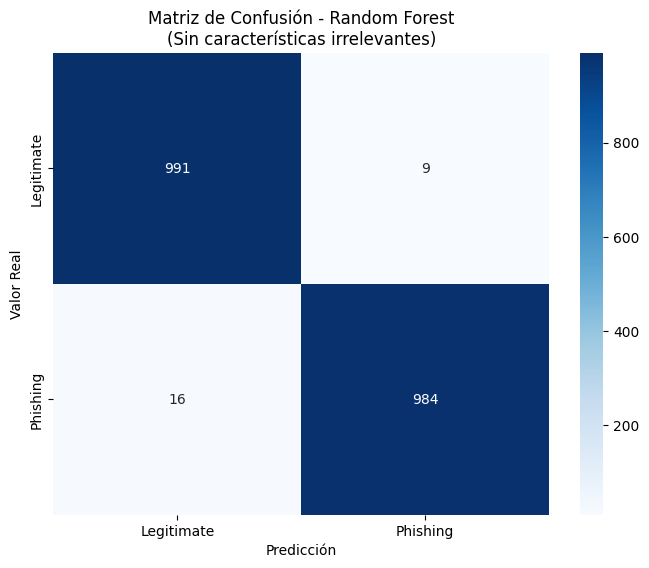


Desglose de la matriz de confusión:
  Verdaderos Negativos (TN): 991
  Falsos Positivos (FP): 9
  Falsos Negativos (FN): 16
  Verdaderos Positivos (TP): 984

Métricas específicas por clase:
  Legitimate:
    Precision: 0.9841
    Recall:    0.9910
    F1-Score:  0.9875
  Phishing:
    Precision: 0.9909
    Recall:    0.9840
    F1-Score:  0.9875


In [ ]:
print("🌲 ENTRENAMIENTO DEL MODELO RANDOM FOREST")
print("="*60)

# Hiperparámetros específicos
rf_params = {
    'n_estimators': 295,
    'max_depth': 52,
    'min_samples_split': 3,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'bootstrap': False,
    'random_state': RANDOM_STATE,
    'n_jobs': -1  # Para acelerar el entrenamiento
}

print("Hiperparámetros del Random Forest:")
for param, value in rf_params.items():
    print(f"  {param}: {value}")

# Entrenar el modelo
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluar Random Forest
rf_metrics = evaluate_model(rf_model, X_test, y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")


🤖 ENTRENAMIENTO DEL MODELO SVM
Hiperparámetros del SVM:
  C: 13.94153
  kernel: rbf
  random_state: 42
  probability: True
  gamma: scale
  shrinking: True
  class_weight: balanced

=== EVALUACIÓN DEL MODELO SVM ===
📊 MÉTRICAS DE RENDIMIENTO:
  Accuracy:  0.9725
  Precision: 0.9727
  Recall:    0.9725
  F1-Score:  0.9725 ⭐ (métrica principal)
  ROC-AUC:   0.9962

📋 REPORTE DE CLASIFICACIÓN DETALLADO:
              precision    recall  f1-score   support

  Legitimate       0.98      0.96      0.97      1000
    Phishing       0.96      0.98      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


🔍 MATRIZ DE CONFUSIÓN:
[[963  37]
 [ 18 982]]


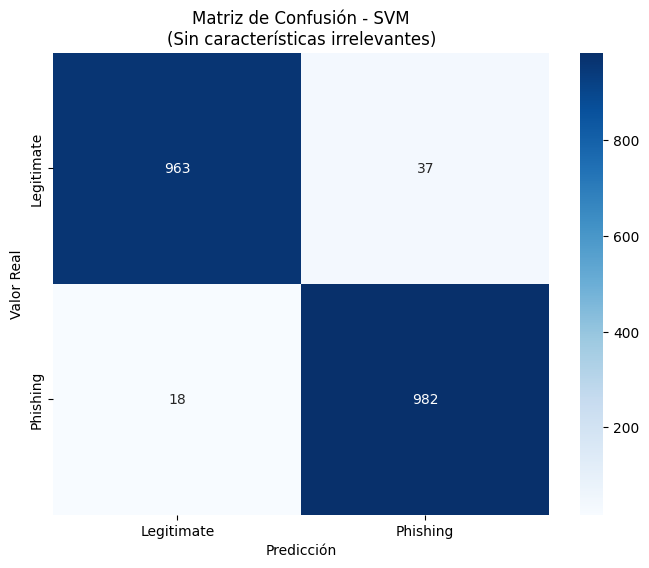


Desglose de la matriz de confusión:
  Verdaderos Negativos (TN): 963
  Falsos Positivos (FP): 37
  Falsos Negativos (FN): 18
  Verdaderos Positivos (TP): 982

Métricas específicas por clase:
  Legitimate:
    Precision: 0.9817
    Recall:    0.9630
    F1-Score:  0.9722
  Phishing:
    Precision: 0.9637
    Recall:    0.9820
    F1-Score:  0.9728


In [ ]:
print("🤖 ENTRENAMIENTO DEL MODELO SVM")
print("="*60)

# Hiperparámetros específicos para SVM
svm_params = {
    'C': 13.94153,
    'kernel': 'rbf',
    'random_state': 42,
    'probability': True,
    'gamma': 'scale',
    'shrinking': True,
    'class_weight': 'balanced'
}

print("Hiperparámetros del SVM:")
for param, value in svm_params.items():
    print(f"  {param}: {value}")

# Entrenar el modelo SVM
svm_model = SVC(**svm_params)
svm_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluar SVM
svm_metrics = evaluate_model(svm_model, X_test_scaled, y_test, y_pred_svm, y_pred_proba_svm, "SVM")


📊 COMPARACIÓN DE MODELOS

 TABLA COMPARATIVA DE RENDIMIENTO:
  Métrica  Random Forest    SVM
 Accuracy         0.9875 0.9725
Precision         0.9875 0.9727
   Recall         0.9875 0.9725
 F1-Score         0.9875 0.9725
  ROC-AUC         0.9991 0.9962

 MEJOR MODELO: Random Forest
   F1-Score: 0.9875


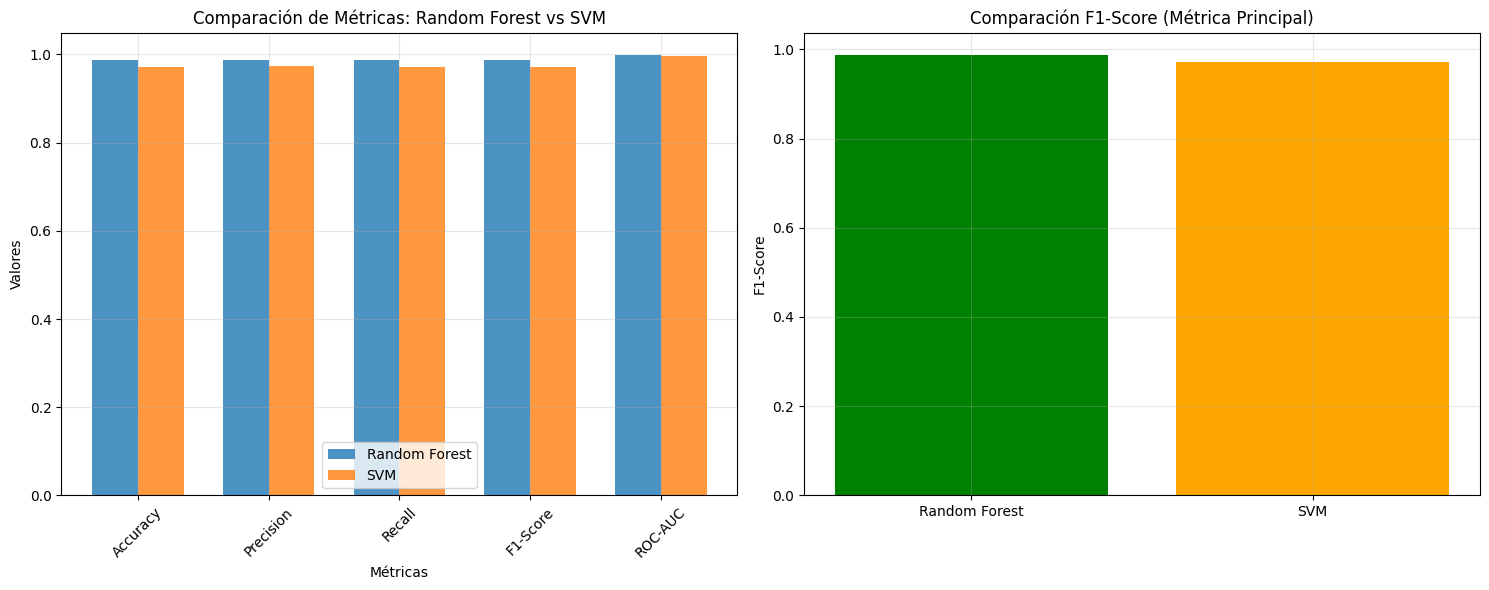


 Evaluación completa terminada
   Características utilizadas: 38
   Características eliminadas: 10
   Mejor modelo: Random Forest (F1-Score: 0.9875)
   Diferencia en F1-Score: 0.0150


In [ ]:
print("📊 COMPARACIÓN DE MODELOS")
print("="*60)

comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Random Forest': [
        rf_metrics['accuracy'],
        rf_metrics['precision'],
        rf_metrics['recall'],
        rf_metrics['f1'],
        rf_metrics['roc_auc']
    ],
    'SVM': [
        svm_metrics['accuracy'],
        svm_metrics['precision'],
        svm_metrics['recall'],
        svm_metrics['f1'],
        svm_metrics['roc_auc']
    ]
})

print("\n TABLA COMPARATIVA DE RENDIMIENTO:")
print(comparison_df.round(4).to_string(index=False))

# Determinar el mejor modelo basado en F1-Score
best_model = "Random Forest" if rf_metrics['f1'] > svm_metrics['f1'] else "SVM"
best_f1 = max(rf_metrics['f1'], svm_metrics['f1'])

print(f"\n MEJOR MODELO: {best_model}")
print(f"   F1-Score: {best_f1:.4f}")

# Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras comparativo
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
rf_values = [rf_metrics['accuracy'], rf_metrics['precision'], rf_metrics['recall'],
             rf_metrics['f1'], rf_metrics['roc_auc']]
svm_values = [svm_metrics['accuracy'], svm_metrics['precision'], svm_metrics['recall'],
              svm_metrics['f1'], svm_metrics['roc_auc']]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, rf_values, width, label='Random Forest', alpha=0.8)
axes[0].bar(x + width/2, svm_values, width, label='SVM', alpha=0.8)
axes[0].set_xlabel('Métricas')
axes[0].set_ylabel('Valores')
axes[0].set_title('Comparación de Métricas: Random Forest vs SVM')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico de radar (solo F1-Score destacado)
axes[1].bar(['Random Forest', 'SVM'], [rf_metrics['f1'], svm_metrics['f1']],
           color=['green' if rf_metrics['f1'] > svm_metrics['f1'] else 'orange',
                  'green' if svm_metrics['f1'] > rf_metrics['f1'] else 'orange'])
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Comparación F1-Score (Métrica Principal)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Evaluación completa terminada")
print(f"   Características utilizadas: {X.shape[1]}")
print(f"   Características eliminadas: {len(existing_features)}")
print(f"   Mejor modelo: {best_model} (F1-Score: {best_f1:.4f})")
print(f"   Diferencia en F1-Score: {abs(rf_metrics['f1'] - svm_metrics['f1']):.4f}")